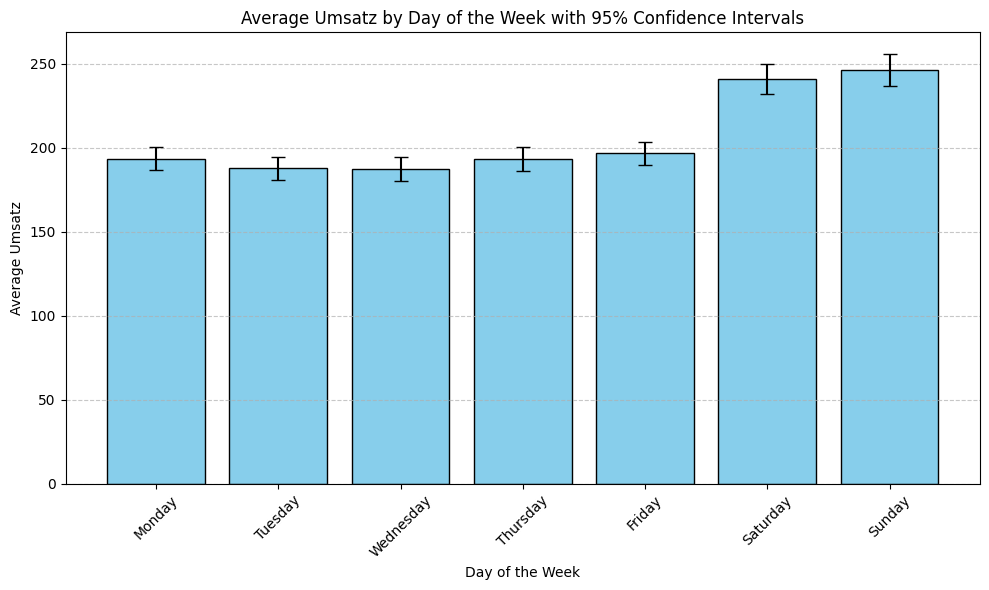

In [50]:
import pandas as pd

df = pd.read_csv('umsatzdaten_gekuerzt.csv')

df['Day'] = pd.to_datetime(df['Datum']).dt.strftime('%A')

mean_values = df.groupby('Day')['Umsatz'].mean().reset_index()
sem = df.groupby('Day')['Umsatz'].sem()
mean_values['SEM'] = sem.values

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

import matplotlib.pyplot as plt

# Reorder the mean_values DataFrame according to day_order
mean_values['Day'] = pd.Categorical(mean_values['Day'], categories=day_order, ordered=True)
mean_values = mean_values.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_values['Day'], mean_values['Umsatz'], capsize=5, color='skyblue', edgecolor='black')
plt.errorbar(mean_values['Day'], mean_values['Umsatz'], yerr=1.96 * mean_values['SEM'], fmt='none', ecolor='black', capsize=5)

plt.xlabel('Day of the Week')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz by Day of the Week with 95% Confidence Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()